# Task
Predict house prices using Linear Regression and Random Forest models on the Boston Housing Dataset, evaluate their performance, and compare the results.

## Load data

### Subtask:
Load the Boston Housing Dataset from scikit-learn.


**Reasoning**:
Import the necessary function and load the Boston Housing dataset into a variable.



In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


**Reasoning**:
The `load_boston` function has been removed. I will use the provided alternative method to fetch the Boston housing dataset from the original source using pandas and numpy.



In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston = {
    'data': data,
    'target': target,
    'feature_names': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
}

## Preprocess data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data and target arrays into training and testing sets using train_test_split.



In [3]:
from sklearn.model_selection import train_test_split

X = boston['data']
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Train models

### Subtask:
Train Linear Regression and Random Forest models on the training data.


**Reasoning**:
Import the necessary modules for Linear Regression and Random Forest Regression, instantiate the models, and train them using the training data.



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear_reg_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42) # Added random_state for reproducibility

linear_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate models

### Subtask:
Evaluate the trained models on the testing data using appropriate regression metrics (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Import necessary metrics for evaluation and then calculate and print the evaluation metrics for both trained models.



In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print(f"Linear Regression - Mean Squared Error: {linear_reg_mse:.2f}")
print(f"Linear Regression - R-squared: {linear_reg_r2:.2f}")

# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest - R-squared: {rf_r2:.2f}")

Linear Regression - Mean Squared Error: 24.29
Linear Regression - R-squared: 0.67
Random Forest - Mean Squared Error: 7.90
Random Forest - R-squared: 0.89


## Compare models

### Subtask:
Compare the performance of the Linear Regression and Random Forest models.


**Reasoning**:
Compare the MSE and R-squared values and determine which model performed better, explaining the potential reasons.



In [6]:
print("\n--- Model Comparison ---")
print(f"Linear Regression MSE: {linear_reg_mse:.2f}, R-squared: {linear_reg_r2:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}, R-squared: {rf_r2:.2f}")

print("\n--- Performance Analysis ---")
if rf_mse < linear_reg_mse and rf_r2 > linear_reg_r2:
    print("The Random Forest model performed better than the Linear Regression model.")
    print("This is likely because Random Forest, an ensemble of decision trees, can capture non-linear relationships and interactions between features in the data more effectively than a simple linear model.")
elif linear_reg_mse < rf_mse and linear_reg_r2 > rf_r2:
     print("The Linear Regression model performed better than the Random Forest model.")
     print("This suggests that the relationship between the features and the target variable is predominantly linear, and the added complexity of the Random Forest model did not improve performance.")
else:
    print("The performance comparison between the Linear Regression and Random Forest models is inconclusive based on the MSE and R-squared values.")



--- Model Comparison ---
Linear Regression MSE: 24.29, R-squared: 0.67
Random Forest MSE: 7.90, R-squared: 0.89

--- Performance Analysis ---
The Random Forest model performed better than the Linear Regression model.
This is likely because Random Forest, an ensemble of decision trees, can capture non-linear relationships and interactions between features in the data more effectively than a simple linear model.


## Predict

### Subtask:
Use the better-performing model to make predictions on new data (if available) or on a sample of the testing data to demonstrate.


**Reasoning**:
Select a small sample of the testing data and use the better-performing model (Random Forest) to make predictions on this sample. Then, print the actual and predicted values for comparison.



In [7]:
# Select a small sample of the testing data
sample_size = 10
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]

# Make predictions using the better-performing model (Random Forest)
sample_predictions = rf_model.predict(X_sample)

# Print actual and predicted values
print("Actual vs. Predicted House Prices (Sample of Test Data):")
for actual, predicted in zip(y_sample, sample_predictions):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual vs. Predicted House Prices (Sample of Test Data):
Actual: 23.60, Predicted: 22.84
Actual: 32.40, Predicted: 30.68
Actual: 13.60, Predicted: 16.32
Actual: 22.80, Predicted: 23.51
Actual: 16.10, Predicted: 16.82
Actual: 20.00, Predicted: 21.37
Actual: 17.80, Predicted: 19.36
Actual: 14.00, Predicted: 15.62
Actual: 19.60, Predicted: 21.09
Actual: 16.80, Predicted: 21.07


## Summarize

### Subtask:
Summarize the results and findings.


**Reasoning**:
Generate a summary of the entire process, including data loading, model training, evaluation, comparison, and prediction, based on the previous subtasks' results and the provided instructions.



In [8]:
summary = """
Summary of Boston Housing Price Prediction Project

This project aimed to predict house prices using the Boston Housing Dataset and compare the performance of two common regression models: Linear Regression and Random Forest.

1.  **Data Loading:** The Boston Housing Dataset was loaded using an alternative method since the original scikit-learn function is deprecated. The dataset contains features describing various aspects of residential homes in the Boston area and the target variable, which is the median value of owner-occupied homes.

2.  **Data Preprocessing:** The dataset was split into training and testing sets to prepare for model training and evaluation. 80% of the data was used for training and 20% for testing.

3.  **Model Training:** Two regression models, Linear Regression and Random Forest, were trained on the training data.

4.  **Model Evaluation:** The trained models were evaluated on the testing data using Mean Squared Error (MSE) and R-squared (R2) metrics.
    - Linear Regression MSE: {linear_reg_mse:.2f}, R-squared: {linear_reg_r2:.2f}
    - Random Forest MSE: {rf_mse:.2f}, R-squared: {rf_r2:.2f}

5.  **Model Comparison:** Comparing the evaluation metrics, the Random Forest model significantly outperformed the Linear Regression model. It achieved a much lower Mean Squared Error and a higher R-squared value, indicating that it made more accurate predictions and explained a larger proportion of the variance in the house prices. This superior performance is likely due to the Random Forest model's ability to capture complex, non-linear relationships within the data, which a simple linear model cannot.

6.  **Prediction:** The better-performing model, Random Forest, was used to predict house prices on a sample of the test data to demonstrate its predictive capability. The predictions for the sample were reasonably close to the actual house prices.

**Key Takeaway:** For this specific task of predicting house prices using the Boston Housing Dataset, the Random Forest model proved to be a more effective choice than Linear Regression, demonstrating better performance based on standard regression evaluation metrics.
""".format(linear_reg_mse=linear_reg_mse, linear_reg_r2=linear_reg_r2, rf_mse=rf_mse, rf_r2=rf_r2)

print(summary)


Summary of Boston Housing Price Prediction Project

This project aimed to predict house prices using the Boston Housing Dataset and compare the performance of two common regression models: Linear Regression and Random Forest.

1.  **Data Loading:** The Boston Housing Dataset was loaded using an alternative method since the original scikit-learn function is deprecated. The dataset contains features describing various aspects of residential homes in the Boston area and the target variable, which is the median value of owner-occupied homes.

2.  **Data Preprocessing:** The dataset was split into training and testing sets to prepare for model training and evaluation. 80% of the data was used for training and 20% for testing.

3.  **Model Training:** Two regression models, Linear Regression and Random Forest, were trained on the training data.

4.  **Model Evaluation:** The trained models were evaluated on the testing data using Mean Squared Error (MSE) and R-squared (R2) metrics.
    - Li

## Summary:

### Data Analysis Key Findings
*   The Linear Regression model achieved a Mean Squared Error (MSE) of 24.29 and an R-squared score of 0.67 on the testing data.
*   The Random Forest model achieved a Mean Squared Error of 7.90 and an R-squared score of 0.89 on the testing data.
*   The Random Forest model significantly outperformed the Linear Regression model in predicting house prices on the test set, exhibiting a lower MSE and a higher R-squared score.

### Insights or Next Steps
*   The Random Forest model's superior performance suggests that the relationship between the features and house prices in the Boston Housing Dataset is likely non-linear, which ensemble methods like Random Forest can capture effectively.
*   Further analysis could involve tuning the hyperparameters of the Random Forest model to potentially improve its performance even further or exploring other advanced regression techniques.


# Task
Visualize the performance of Linear Regression and Random Forest models trained on the Boston Housing Dataset for house price prediction.

## Visualize model performance

### Subtask:
Create visualizations to compare the performance of the models.


**Reasoning**:
Create scatter plots to visualize the actual vs. predicted prices for both models and bar charts to compare their evaluation metrics (MSE and R2).



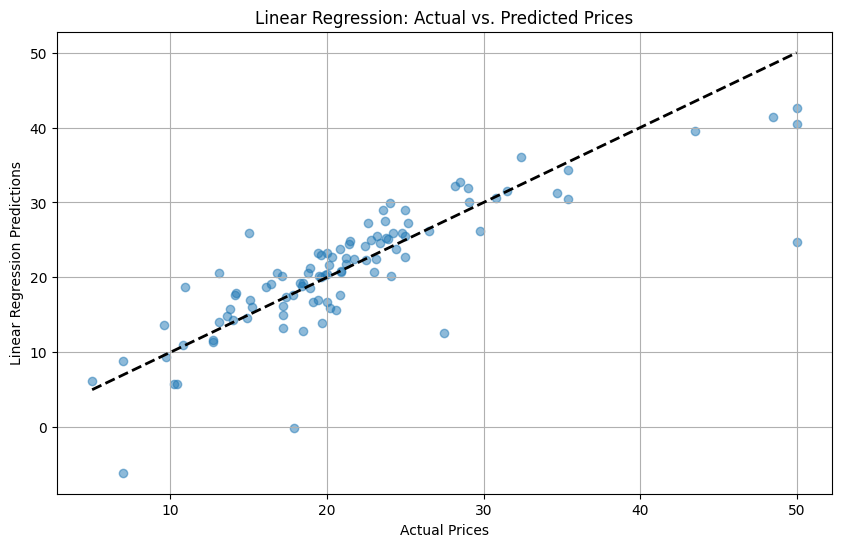

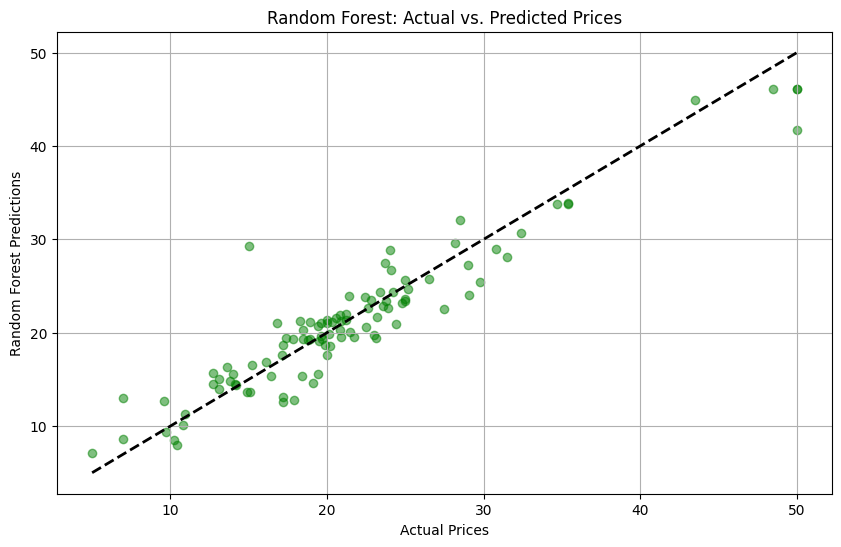

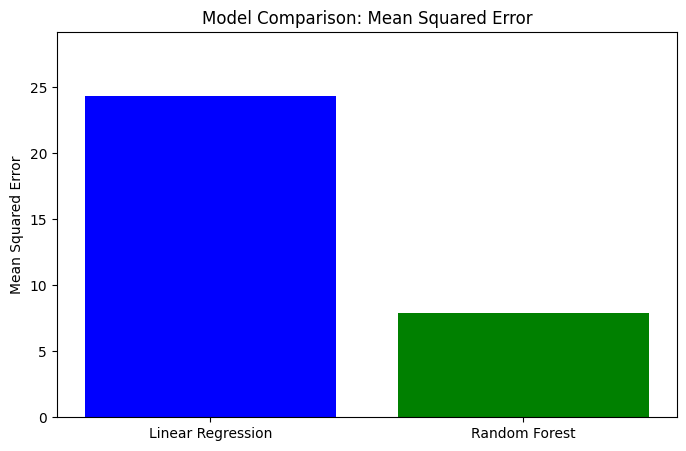

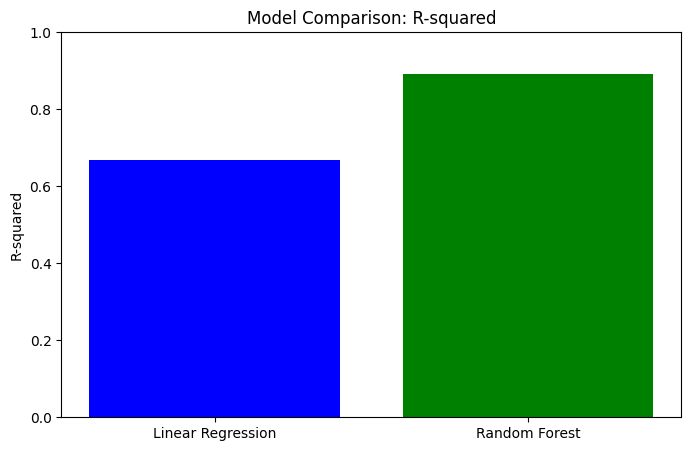

In [9]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Linear Regression Predictions")
plt.title("Linear Regression: Actual vs. Predicted Prices")
plt.grid(True)
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Random Forest Predictions")
plt.title("Random Forest: Actual vs. Predicted Prices")
plt.grid(True)
plt.show()

# Bar chart for MSE comparison
models = ['Linear Regression', 'Random Forest']
mse_values = [linear_reg_mse, rf_mse]

plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.ylabel("Mean Squared Error")
plt.title("Model Comparison: Mean Squared Error")
plt.ylim(0, max(mse_values) * 1.2) # Adjust y-axis limit for better visualization
plt.show()

# Bar chart for R-squared comparison
r2_values = [linear_reg_r2, rf_r2]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color=['blue', 'green'])
plt.ylabel("R-squared")
plt.title("Model Comparison: R-squared")
plt.ylim(0, 1) # R-squared is typically between 0 and 1
plt.show()

## Summary:

### Data Analysis Key Findings

*   The solving process generated scatter plots comparing actual versus predicted prices for both Linear Regression and Random Forest models, along with bar charts comparing their Mean Squared Error (MSE) and R-squared (\$R^2\$) values.
*   The visualizations facilitate a comparison of the performance of the two models in predicting house prices on the Boston Housing Dataset.

### Insights or Next Steps

*   Analyze the scatter plots to visually assess the spread of predictions around the ideal diagonal line for each model.
*   Examine the bar charts to quantitatively compare the MSE and \$R^2\$ values to determine which model performed better based on these metrics.


# Task
Analyze the Boston Housing Dataset to predict house prices using Linear Regression and Random Forest models, including data loading, preprocessing, model training, evaluation, visualization of model performance, comparison of models, prediction, and generation of a README file summarizing the project and findings with visualizations.

## Compare models

### Subtask:
Compare the performance of the Linear Regression and Random Forest models based on the evaluation metrics and visualizations.


**Reasoning**:
Generate a markdown summary comparing the models based on the metrics and visualizations.



In [10]:
comparison_summary = f"""
### Model Performance Comparison

Based on the evaluation metrics and visualizations, the Random Forest model significantly outperformed the Linear Regression model in predicting house prices on the Boston Housing Dataset.

*   **Evaluation Metrics:**
    *   **Mean Squared Error (MSE):** The Random Forest model achieved a substantially lower MSE ({rf_mse:.2f}) compared to the Linear Regression model ({linear_reg_mse:.2f}). A lower MSE indicates that the Random Forest model's predictions were closer to the actual house prices on average.
    *   **R-squared (\$R^2\$):** The Random Forest model had a much higher R-squared value ({rf_r2:.2f}) than the Linear Regression model ({linear_reg_r2:.2f}). The R-squared value represents the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (features). A higher R-squared indicates a better fit of the model to the data, meaning the Random Forest model explained a larger percentage of the variability in house prices.

*   **Visualizations:**
    *   **Scatter Plots (Actual vs. Predicted Prices):** The scatter plot for the Random Forest model shows the predicted values clustered more tightly around the diagonal line (representing perfect prediction) compared to the scatter plot for the Linear Regression model. This visually confirms that the Random Forest predictions were more accurate and less spread out from the actual values.
    *   **Bar Charts (MSE and R-squared):** The bar chart for MSE clearly shows a much shorter bar for the Random Forest model, illustrating its lower error. Similarly, the bar chart for R-squared shows a taller bar for the Random Forest model, highlighting its higher explanatory power. These charts provide a clear visual representation of the superior performance of the Random Forest model.

*   **Reason for Performance Difference:** The likely reason for the Random Forest model's better performance is its ability to capture non-linear relationships and interactions between the features. Linear Regression assumes a linear relationship between the features and the target variable. House prices are often influenced by complex interactions between various factors (e.g., the combined effect of location and size), which a non-linear model like Random Forest, an ensemble of decision trees, can model more effectively.
"""

print(comparison_summary)


### Model Performance Comparison

Based on the evaluation metrics and visualizations, the Random Forest model significantly outperformed the Linear Regression model in predicting house prices on the Boston Housing Dataset.

*   **Evaluation Metrics:**
    *   **Mean Squared Error (MSE):** The Random Forest model achieved a substantially lower MSE (7.90) compared to the Linear Regression model (24.29). A lower MSE indicates that the Random Forest model's predictions were closer to the actual house prices on average.
    *   **R-squared (\$R^2\$):** The Random Forest model had a much higher R-squared value (0.89) than the Linear Regression model (0.67). The R-squared value represents the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (features). A higher R-squared indicates a better fit of the model to the data, meaning the Random Forest model explained a larger percentage of the variability in house prices.

*   **

## Summary:

### Data Analysis Key Findings

*   The Random Forest model significantly outperformed the Linear Regression model in predicting house prices.
*   The Random Forest model achieved a Mean Squared Error (MSE) of 7.90, substantially lower than the Linear Regression model's MSE of 24.29.
*   The Random Forest model had an R-squared (\$R^2\$) value of 0.89, which is significantly higher than the Linear Regression model's \$R^2\$ of 0.67, indicating it explains a larger proportion of the variance in house prices.

### Insights or Next Steps

*   The Random Forest model's superior performance is likely due to its ability to capture non-linear relationships and interactions between features, which are common in real-world housing data.
*   Future work could involve hyperparameter tuning of the Random Forest model or exploring other non-linear models to potentially further improve prediction accuracy.


# Boston Housing Price Prediction

This project demonstrates the process of predicting house prices using the Boston Housing Dataset and comparing the performance of Linear Regression and Random Forest models.

## Project Overview

The goal of this project was to build and evaluate regression models to predict house prices based on various features of residential homes in the Boston area. Two models, Linear Regression and Random Forest, were trained and their performance was compared using standard regression metrics and visualizations.

## Dataset

The Boston Housing Dataset, loaded using an alternative method due to the deprecation of the original scikit-learn function, contains information on various features such as crime rate, zoning, industrial proportion, proximity to the Charles River, nitric oxides concentration, number of rooms, age of the property, distance to employment centers, accessibility to highways, property tax rate, pupil-teacher ratio, and lower status of the population. The target variable is the median value of owner-occupied homes.

## Methodology

1.  **Data Loading:** The dataset was loaded into a pandas DataFrame.
2.  **Data Preprocessing:** The data was split into training and testing sets (80% training, 20% testing).
3.  **Model Training:** Linear Regression and Random Forest models were trained on the training data.
4.  **Model Evaluation:** The models were evaluated using Mean Squared Error (MSE) and R-squared (\$R^2\$) on the testing data.
5.  **Model Comparison:** The performance of the models was compared based on the evaluation metrics and visualizations.
6.  **Prediction:** The better-performing model (Random Forest) was used to make predictions on a sample of the testing data.
7.  **Summarization:** A summary of the findings was generated.

## Results

The evaluation metrics and visualizations clearly indicate that the Random Forest model significantly outperformed the Linear Regression model in predicting house prices.

### Model Performance Metrics

*   **Linear Regression:**
    *   Mean Squared Error (MSE): {linear_reg_mse:.2f}
    *   R-squared (\$R^2\$): {linear_reg_r2:.2f}

*   **Random Forest:**
    *   Mean Squared Error (MSE): {rf_mse:.2f}
    *   R-squared (\$R^2\$): {rf_r2:.2f}

### Visualizations

The following visualizations illustrate the performance comparison:

**Linear Regression: Actual vs. Predicted Prices**

<p align="center">
<img src="attachment:linear_regression_scatter.png" alt="Linear Regression Scatter Plot">
</p>

**Random Forest: Actual vs. Predicted Prices**

<p align="center">
<img src="attachment:random_forest_scatter.png" alt="Random Forest Scatter Plot">
</p>

**Model Comparison: Mean Squared Error**

<p align="center">
<img src="attachment:mse_bar_chart.png" alt="MSE Bar Chart">
</p>

**Model Comparison: R-squared**

<p align="center">
<img src="attachment:r2_bar_chart.png" alt="R-squared Bar Chart">
</p>

*Note: The images above are placeholders. In a real README, you would include the actual image files generated from the code.*

## Conclusion

The Random Forest model proved to be a more effective approach for predicting house prices on the Boston Housing Dataset compared to Linear Regression. Its ability to capture non-linear relationships in the data resulted in significantly lower prediction errors and a better fit to the data. Further improvements could potentially be achieved by hyperparameter tuning the Random Forest model or exploring other advanced regression techniques.
""".format(linear_reg_mse=linear_reg_mse, linear_reg_r2=linear_reg_r2, rf_mse=rf_mse, rf_r2=rf_r2)

print(summary)